In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = {
    "ID": [1,2,3,4,5,6,7,8],
    "Height": [177,187,165,161,175,172,183,159],
    "Weight": [74,89,59,65,69,61,80,57],
    "Eye Color": ["Blue", "Green", "Green", "Brown", "Brown", "Green", "Blue", "Green"],
    "Label": ["Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female"]
}

df_small = pd.DataFrame.from_dict(data)
df_small

,ID,Height,Weight,Eye Color,Label
0,1,177,74,Blue,Male
1,2,187,89,Green,Male
2,3,165,59,Green,Female
3,4,161,65,Brown,Female
4,5,175,69,Brown,Male
5,6,172,61,Green,Female
6,7,183,80,Blue,Male
7,8,159,57,Green,Female


<AxesSubplot:xlabel='Height', ylabel='Weight'>

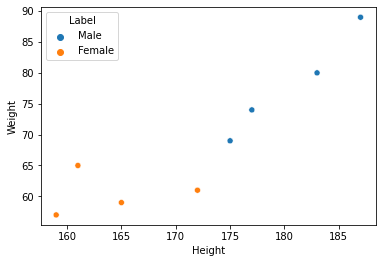

In [3]:
sns.scatterplot(data=df_small, x="Height", y="Weight", hue="Label")

In [4]:
dataset = []
eye_colors = ["Green", "Blue", "Brown"]

# females
for i in range(5000):
    randomness = random.uniform(0, 1.0)
    height = random.randint(150,185)
    if height < 170:
        weight = random.randint(55,75)
    else:
        weight = random.randint(60,85)
    color = random.choice(eye_colors)
    if randomness > 0.95:
        dataset.append([i, height, weight, color, "Male"])
    else:
        dataset.append([i, height, weight, color, "Female"])

# males 
for i in range(5000):
    randomness = random.uniform(0, 1.0)
    height = random.randint(160,205)
    if height < 185:
        weight = random.randint(60,85)
    else:
        weight = random.randint(75,110)
    color = random.choice(eye_colors)
    if randomness > 0.95:
        dataset.append([5000 + i, height, weight, color, "Female"])
    else:
        dataset.append([5000 + i, height, weight, color, "Male"])


In [5]:
random.shuffle(dataset)

In [6]:
df = pd.DataFrame(dataset)
df.columns = ["ID", "Height", "Weight", "Eye Color", "Label"]
df

,ID,Height,Weight,Eye Color,Label
0,927,159,58,Brown,Female
1,924,171,71,Green,Female
2,4957,161,62,Brown,Female
3,7702,204,97,Blue,Male
4,1885,156,75,Blue,Female
...,...,...,...,...,...
9995,5315,174,82,Blue,Female
9996,2058,150,71,Brown,Female
9997,7703,179,60,Brown,Male
9998,93,164,75,Blue,Female


<AxesSubplot:xlabel='Height', ylabel='Weight'>

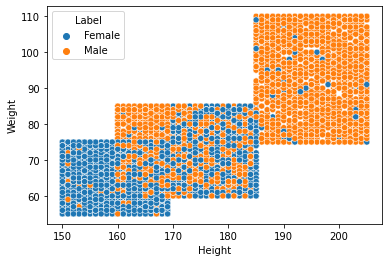

In [7]:
sns.scatterplot(data=df, x="Height", y="Weight", hue="Label")

In [8]:
X, y = df[["Height", "Weight"]], df["Label"]

In [9]:
random_seed=42
lr = LogisticRegression(random_state=random_seed)
dt = DecisionTreeClassifier(random_state=random_seed)
svm = SVC(random_state=random_seed)

In [10]:
score_lr = cross_val_score(lr, X, y, cv=5, scoring="accuracy")
print(f"Accuracy for Logistic Regression: {mean(score_lr)}")
score_dt = cross_val_score(dt, X, y, cv=5, scoring="accuracy")
print(f"Accuracy for Decision Tree: {mean(score_dt)}")
score_svm = cross_val_score(svm, X, y, cv=5, scoring="accuracy")
print(f"Accuracy for SVM: {mean(score_svm)}")

Accuracy for Logistic Regression: 0.6955
Accuracy for Decision Tree: 0.7151
Accuracy for SVM: 0.6991999999999999
